##### Nama            : Angelica Widyastuti Kolo
##### NIM             : A11.2021.13212
##### Kelompok Matkul : Data Mining - A11.4504

# Penerapan K-Means Clustering Untuk Mengetahui Pergerakan Kenaikan, Penurunan, dan Sideways Harga Bitcoin (BTC)

## Ringkasan dan Permasalahan Project

### Ringkasan

Bitcoin adalah salah satu aset digital yang memiliki volatilitas tinggi, sehingga penting untuk menganalisis pergerakan harganya. 
Proyek ini bertujuan untuk mengelompokkan pola pergerakan harga Bitcoin per bulan berdasarkan data historis, serta memberikan analisis apakah bulan tertentu menunjukkan pola naik, turun, atau sideways.

### Permasalahan 

- Bagaimana mengelompokkan data pergerakan harga Bitcoin per bulan berdasarkan pola historis?
- Bagaimana mendeteksi pola (naik, turun, sideways) untuk setiap bulan yang dianalisis?

## Tujuan Yang Akan Dicapai

- Melakukan analisis eksplorasi data (EDA) terhadap dataset harga Bitcoin.
- Menerapkan algoritma K-Means Clustering untuk mengelompokkan data.
- Memberikan visualisasi yang informatif dan interaktif.

## Model / Alur Penyelesaian 

![Alur Penyelesaian](AlurPenyelesaian.png)

## Penjelasan Dataset, EDA, dan Proses Features Dataset

### Penjelasan Dataset

1) Sumber Data: Dataset ini berisi data historis harga Bitcoin yang kemungkinan
diperoleh dari sumber pasar cryptocurrency seperti platform Indodax atau Trading
View. Data ini mencakup perubahan harga harian dan volume perdagangan.

2) Penjelasan Atribut :
- **Tanggal**    : Tanggal pencatatan data harian.
- **Terakhir**   : Harga penutupan Bitcoin pada hari tersebut.
- **Pembukaan**  : Harga pembukaan Bitcoin di awal hari.
- **Tertinggi**  : Harga tertinggi Bitcoin yang dicapai dalam hari tersebut.
- **Terendah**   : Harga terendah Bitcoin yang dicapai dalam hari tersebut.
- **Vol**        : Volume perdagangan harian (belum tercantum nilai, mungkin perlu
diperbaiki atau diperoleh data volume yang lebih lengkap).
- **Perubahan%** : Persentase perubahan harga dibandingkan hari sebelumnya.

### EDA

Pada tahap ini, kita akan melakukan eksplorasi data untuk memahami distribusi dan pola dalam dataset. Langkah-langkah yang dilakukan meliputi:
- **Informasi dataset**   : Menampilkan informasi umum seperti jumlah baris, kolom, dan tipe data.
- **Statistik deskriptif**: Melihat statistik ringkasan untuk kolom numerik.
- **Distribusi data**     : Memvisualisasikan distribusi data untuk kolom-kolom penting.

### Proses Features Dataset

Proses ini mencakup:
- Membersihkan data dengan menghapus atau menangani kolom yang kosong.
- Mengonversi data numerik dari format string ke float untuk diproses lebih lanjut.
- Memilih kolom-kolom yang relevan untuk analisis.

## Proses Learning/Modeling

### Pre-Processing Data

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score, silhouette_score, calinski_harabasz_score

In [5]:
#load dataset
# Load Dataset
file_path = 'Dataset-terbaru.csv'  
dataset = pd.read_csv(file_path)
dataset.head()

,Tanggal,Terakhir,Pembukaan,Tertinggi,Terendah,Vol.,Perubahan%
0,11/12/2024,1.555.160.960,1.545.462.016,1.558.300.032,1.531.399.040,NaN,"0,63%"
1,10/12/2024,1.545.462.016,1.558.404.992,1.564.996.992,1.510.004.992,NaN,"-0,83%"
2,09/12/2024,1.558.404.992,1.598.880.000,1.599.000.064,1.524.999.936,NaN,"-2,53%"
3,08/12/2024,1.598.880.000,1.576.859.008,1.599.000.064,1.570.001.024,NaN,"1,40%"
4,07/12/2024,1.576.859.008,1.577.532.032,1.589.998.976,1.566.733.056,NaN,"-0,04%"


In [6]:
#jumlah data
dataset.shape

(98, 7)

In [7]:
# Data Cleaning
def clean_numeric_column(column):
    return column.str.replace('.', '', regex=False).str.replace(',', '.', regex=False).astype(float)

dataset['Tanggal'] = pd.to_datetime(dataset['Tanggal'], format='%d/%m/%Y')
dataset['Terakhir'] = clean_numeric_column(dataset['Terakhir'])
dataset['Pembukaan'] = clean_numeric_column(dataset['Pembukaan'])
dataset['Tertinggi'] = clean_numeric_column(dataset['Tertinggi'])
dataset['Terendah'] = clean_numeric_column(dataset['Terendah'])
dataset['Perubahan%'] = dataset['Perubahan%'].str.replace('%', '').str.replace(',', '.').astype(float)
dataset = dataset.drop(columns=['Vol.'], errors='ignore')

In [8]:
# Aggregate Monthly Data
dataset['Month'] = dataset['Tanggal'].dt.to_period('M')
monthly_data = dataset.groupby('Month').agg({
    'Terakhir': 'mean',
    'Pembukaan': 'mean',
    'Tertinggi': 'mean',
    'Terendah': 'mean',
    'Perubahan%': 'mean'
}).reset_index()

### Clustering

In [9]:
# Clustering with K-Means
optimal_k = 3  # Jumlah cluster
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
features = monthly_data.drop(columns=['Month']).values
monthly_data['Cluster'] = kmeans.fit_predict(features)

### Evaluasi Performa Model

In [10]:
# Evaluasi Performa Model
dbs = davies_bouldin_score(features, kmeans.labels_)  # Davies-Bouldin Score
ss = silhouette_score(features, kmeans.labels_)  # Silhouette Score
inertia = kmeans.inertia_  # Inertia
chs = calinski_harabasz_score(features, kmeans.labels_)  # Calinski-Harabasz Index

In [11]:
# Cetak Hasil Evaluasi Performa
print("\nEvaluasi Performa Model:")
print(f"Davies-Bouldin Score: {dbs}")
print(f"Silhouette Score: {ss}")
print(f"Inertia (Sum of Squared Distances): {inertia}")
print(f"Calinski-Harabasz Index: {chs}")


Evaluasi Performa Model:
Davies-Bouldin Score: 0.10854719416175346
Silhouette Score: 0.3762441059780483
Inertia (Sum of Squared Distances): 1.8168122863526036e+16
Calinski-Harabasz Index: 28.100114141018647


### Hasil 

In [12]:
# Menentukan Bulan untuk Analisis
print("Pilih bulan yang tersedia untuk analisis:")
print(monthly_data['Month'].astype(str).tolist())

Pilih bulan yang tersedia untuk analisis:
['2024-09', '2024-10', '2024-11', '2024-12']


In [13]:
# Input dari pengguna
selected_month = input("Masukkan bulan yang ingin dianalisis (format: YYYY-MM): ")

Masukkan bulan yang ingin dianalisis (format: YYYY-MM):  2024-09


In [14]:
# Filter Data untuk Bulan yang Dipilih
selected_data = monthly_data[monthly_data['Month'].astype(str) == selected_month]

if selected_data.empty:
    print(f"Bulan {selected_month} tidak ditemukan dalam dataset.")
else:
    # Analisis Pergerakan
    cluster_label = selected_data['Cluster'].iloc[0]
    if cluster_label == 0:
        movement = "Pergerakan harga cenderung **turun**."
    elif cluster_label == 1:
        movement = "Pergerakan harga cenderung **naik**."
    else:
        movement = "Pergerakan harga cenderung **sideways**."

    print(f"\nAnalisis Bulan {selected_month}:")
    print(movement)


Analisis Bulan 2024-09:
Pergerakan harga cenderung **naik**.


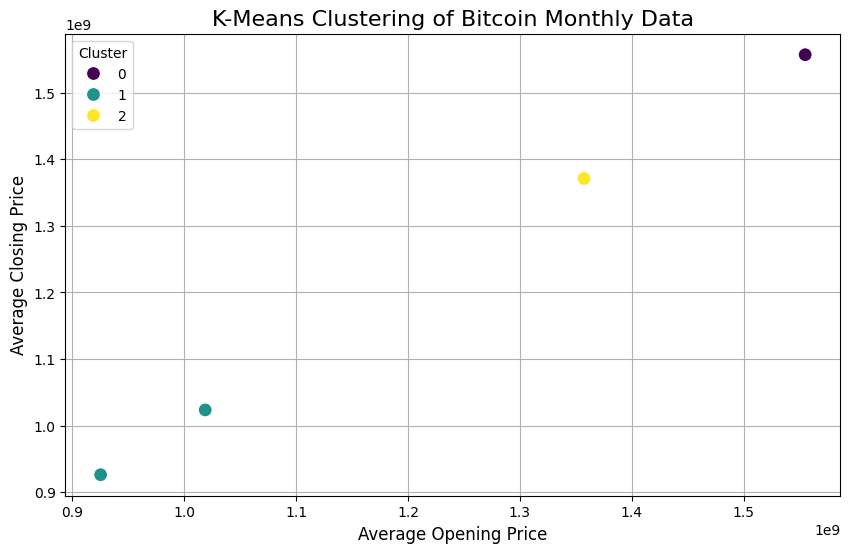

In [15]:
# Visualisasi Scatter Plot Cluster
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=monthly_data['Pembukaan'],
    y=monthly_data['Terakhir'],
    hue=monthly_data['Cluster'],
    palette='viridis',
    s=100
)
plt.title('K-Means Clustering of Bitcoin Monthly Data', fontsize=16)
plt.xlabel('Average Opening Price', fontsize=12)
plt.ylabel('Average Closing Price', fontsize=12)
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

In [16]:
# Filter Data Harian untuk Bulan yang Dipilih
daily_data = dataset[dataset['Tanggal'].dt.to_period('M') == selected_month]

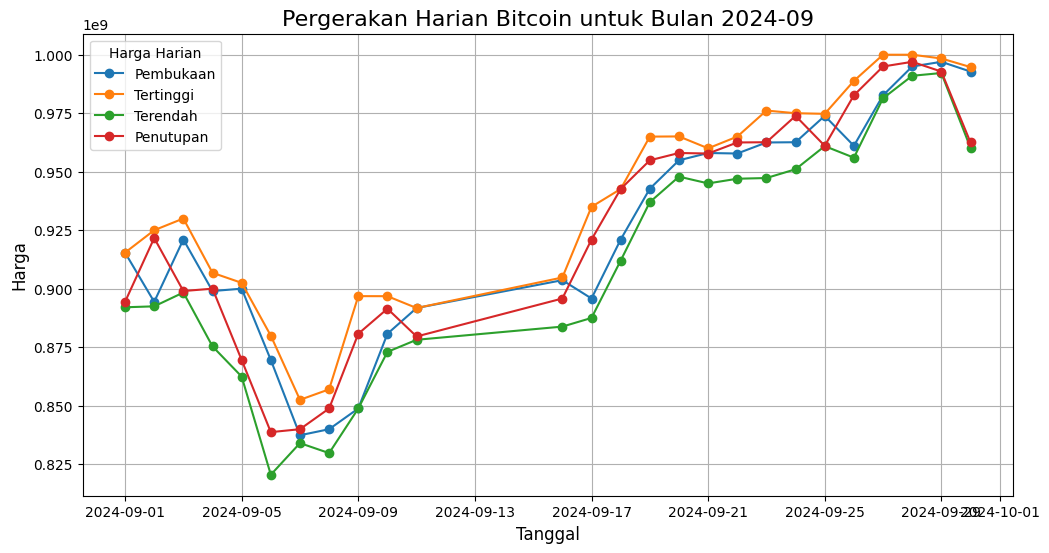

In [17]:
 # Visualisasi Data Harian
plt.figure(figsize=(12, 6))
plt.plot(daily_data['Tanggal'], daily_data['Pembukaan'], label='Pembukaan', marker='o')
plt.plot(daily_data['Tanggal'], daily_data['Tertinggi'], label='Tertinggi', marker='o')
plt.plot(daily_data['Tanggal'], daily_data['Terendah'], label='Terendah', marker='o')
plt.plot(daily_data['Tanggal'], daily_data['Terakhir'], label='Penutupan', marker='o')
plt.title(f'Pergerakan Harian Bitcoin untuk Bulan {selected_month}', fontsize=16)
plt.xlabel('Tanggal', fontsize=12)
plt.ylabel('Harga', fontsize=12)
plt.legend(title='Harga Harian')
plt.grid(True)
plt.show()

In [18]:
# Tampilkan Data Harian
print("\nDetail Data Harian:")
print(daily_data[['Tanggal', 'Pembukaan', 'Tertinggi', 'Terendah', 'Terakhir']])


Detail Data Harian:
      Tanggal    Pembukaan     Tertinggi     Terendah     Terakhir
72 2024-09-30  992803968.0  9.947260e+08  960188992.0  962491008.0
73 2024-09-29  996968000.0  9.983990e+08  992179968.0  992803968.0
74 2024-09-28  994971008.0  1.000000e+09  991000000.0  996968000.0
75 2024-09-27  982657024.0  1.000000e+09  981380992.0  994971008.0
76 2024-09-26  961062976.0  9.888160e+08  956000000.0  982657024.0
77 2024-09-25  973867008.0  9.747380e+08  960942976.0  961062976.0
78 2024-09-24  962601024.0  9.750000e+08  951049984.0  973867008.0
79 2024-09-23  962497984.0  9.761310e+08  947302976.0  962601024.0
80 2024-09-22  957779008.0  9.650000e+08  947000000.0  962497984.0
81 2024-09-21  958000000.0  9.600000e+08  945001984.0  957779008.0
82 2024-09-20  954873024.0  9.650820e+08  947897984.0  958000000.0
83 2024-09-19  942745984.0  9.650000e+08  937000000.0  954873024.0
84 2024-09-18  920998976.0  9.426100e+08  912000000.0  942609984.0
85 2024-09-17  895809984.0  9.350000e+08 

## Diskusi Hasil dan Kesimpulan

### Diskusi Hasil

Setelah melakukan proses klasterisasi menggunakan algoritma yang relevan, berikut adalah hasil yang ditemukan:

1. Dataset Bitcoin berhasil dibagi menjadi beberapa klaster berdasarkan pola harga dan perubahan persen.
2. Klaster menunjukkan kelompok hari-hari dengan karakteristik harga tertentu, misalnya:
   - **Cluster 0**: Hari-hari dengan tren penurunan harga Bitcoin.
   - **Cluster 1**: Hari-hari dengan tren kenaikan harga Bitcoin.
   - **Cluster 2**: Hari-hari dengan harga yang relatif stabil (sideways).
3. Visualisasi hasil klasterisasi menunjukkan adanya pemisahan yang baik antar klaster, meskipun terdapat beberapa overlap.

### Kesimpulan

Dari Hasil Pelatihan diatas, dapat ditarik beberapa kesimpulan, diantaranya :
- Clusterisasi memberikan wawasan yang berharga tentang perilaku harga Bitcoin, yang dapat membantu dalam pengambilan keputusan investasi atau analisis pasar lebih lanjut.
- Cluster 0 (turun), Cluster 1 (naik), dan Cluster 2 (sideways) memberikan klasifikasi yang dapat diintegrasikan ke dalam strategi perdagangan atau model prediksi lainnya.
- Langkah berikutnya adalah menguji integrasi hasil Clusterisasi dengan algoritma prediksi atau strategi perdagangan untuk meningkatkan akurasi dan efektivitas.